<h1>CP321: Analysis of the highest weekly earners in Canada</h1>
<center><h3>Sohan Hossain, Prithvi Paturi, Vikas Movva</h3></center>



<h2><u>Introduction</u></h2>

Money is what makes the world go round. It’s not a doubt that a majority of people are interested in knowing how to make more money. Our project focuses on understanding how education influences income in Canada, while also emphasizing factors such as age and geographic location. Our dataset analysis aims to pinpoint which group in the Canadian workforce earns the most each week, while also interpreting those factors individually.

<h2><u>Problem Question</u></h2>

<h3>How do education level, age group, and employment type affect the average weekly wage in Canada? </h3>

<h2><u>Data Source and Description</u></h2>

The dataset for this project is derived from a compilation of Canadian wage data, which has been made to reflect earnings across various demographics. The source of the data is data.ontario.ca, ensuring data reliablity and relevance.

<h2><u>Scope and Limitations</u></h2>

The dataset contains information from the year 1997 covering a wide demographic spread. The dataset is limited in the sense of of going up to Dec 2020, with no information on the wage changes post-covid.

<h2><u>Variables</u></h2>


<b>Education Level:</b> Categorized from "Some high school" to "Above bachelor's degree". This variable assesses the correlation between educational attainment and wage levels.

<b>Age Group: </b>Divided into segments such as 18-25, 26-35, etc., to analyze earnings across different life stages.

<b>Employment Type:</b> Includes classifications such as full-time, part-time, contractual, etc., reflecting the diversity of employment conditions.

<b>Average Weekly Wage:</b> The primary outcome variable, indicating the mean wage earned per week within each subgroup.




<h2><u></u></h2>



<h2><u>Impact of education level on weekly wage</u></h2>


/var/folders/0c/cxsmtwm95h74gztvdhmp_m0r0000gn/T/ipykernel_49796/1783825339.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education_wages_full_time_ordered = full_time_data.groupby('Education level')['Both Sexes'].mean().reset_index()


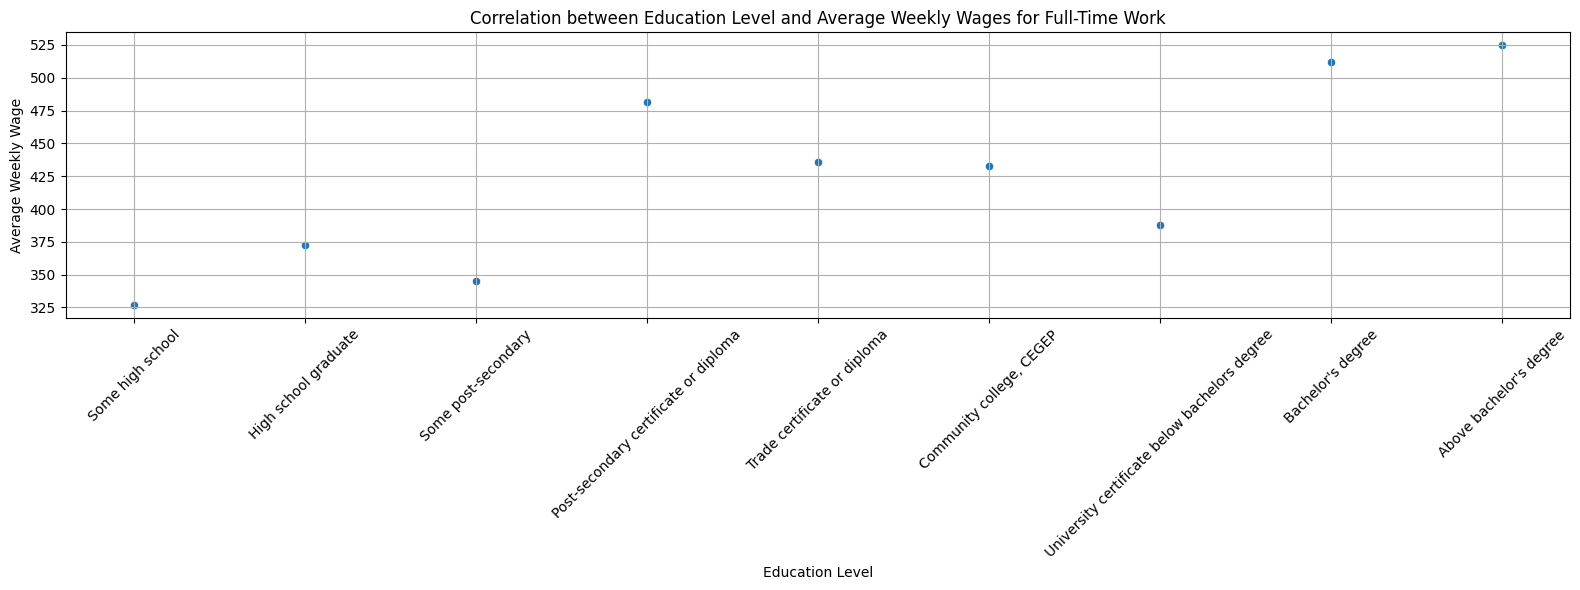

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('dataset.csv')
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
data = df[df['YEAR'] >= 2013]

# Filter full-time data
full_time_data = data[data['Type of work'].str.strip() == 'Full-time'].copy()

# Define the education level order
education_level_order = [
    'Some high school',
    'High school graduate',
    'Some post-secondary',
    'Post-secondary certificate or diploma',
    'Trade certificate or diploma',
    'Community college, CEGEP',
    'University certificate below bachelors degree',
    "Bachelor's degree",
    "Above bachelor's degree"
]

# Clean education level column
full_time_data['Education level'] = full_time_data['Education level'].str.strip()
full_time_data = full_time_data[~full_time_data['Education level'].isin(['0 - 8 years', 'University degree'])]
full_time_data['Education level'] = pd.Categorical(full_time_data['Education level'], categories=education_level_order, ordered=True)

# Group by education level and calculate mean wages
education_wages_full_time_ordered = full_time_data.groupby('Education level')['Both Sexes'].mean().reset_index()

# Plot
plt.figure(figsize=(16, 6))
sns.scatterplot(data=education_wages_full_time_ordered, x='Education level', y='Both Sexes')
plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Average Weekly Wage')
plt.title('Correlation between Education Level and Average Weekly Wages for Full-Time Work')
plt.grid(True)
plt.tight_layout()
plt.show()


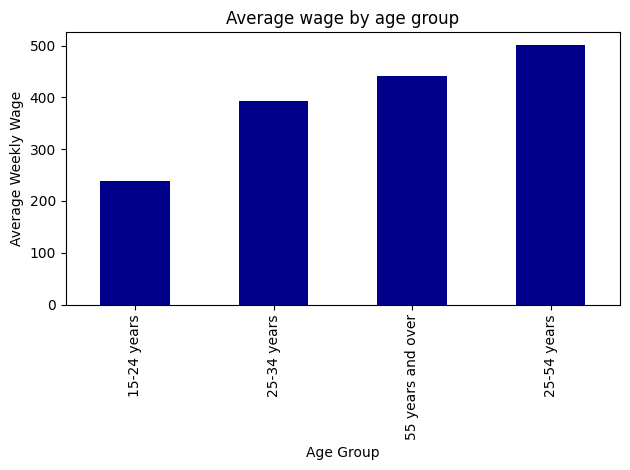

In [72]:
selected_age_groups = ['15-24 years', '25-34 years', '25-54 years', '55 years and over']

filtered_data = full_time_data[full_time_data['Age group'].isin(selected_age_groups)]

average_wage_by_age = filtered_data.groupby('Age group')['Both Sexes'].mean().sort_values()

average_wage_by_age.plot(kind='bar', color='darkblue')  
plt.xlabel('Age Group')
plt.ylabel('Average Weekly Wage')
plt.title('Average wage by age group')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()


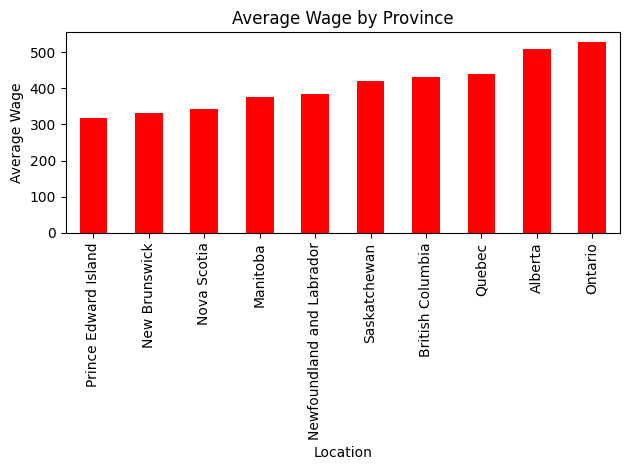

In [73]:
filtered_data = full_time_data[full_time_data['Geography'] != 'Canada']

filtered_data.groupby('Geography')['Both Sexes'].mean().sort_values().plot(kind='bar', color='red')

plt.xlabel('Location')
plt.ylabel('Average Wage')
plt.title('Average Wage by Province')
plt.xticks(rotation=90)  
plt.tight_layout() 
plt.show()

<h2><u>Influence of each factors</u></h2>

<b>Education</b>:There is a positive correlation between education and wages, where each successive level of education may lead to a higher increase in earnings. It shows in the graph that on average, completing a bachelor's degree typically results in significantly higher lifetime earnings compared to just a high school diploma.

<b>Age:</b> One's age can influence their earning potential as it often represents experience and seniority. Typically, wages increase from when individuals are entering the market to mid-career as they gain experience and possibly move into higher-paying positions. However, after reaching a certain age, earning potential may plateau or even decrease, which can be attributed to factors such as retirement.

<b>Geographical Location:</b> Wages across Canada vary significantly by province due to differences in local economies, cost of living, and industrial focus. Provinces with a strong presence in high-paying industries such as finance and technology, like Ontario and British Columbia, often have higher average wages. In contrast, provinces that rely more on agriculture or have less economic diversity. Additionally, urban areas within provinces generally offer higher wages compared to rural areas due to a greater concentration of businesses and higher living costs.


/var/folders/0c/cxsmtwm95h74gztvdhmp_m0r0000gn/T/ipykernel_49796/1308420637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age group'] = data['Age group'].str.strip()
/var/folders/0c/cxsmtwm95h74gztvdhmp_m0r0000gn/T/ipykernel_49796/1308420637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Education level'] = data['Education level'].str.strip()
/var/folders/0c/cxsmtwm95h74gztvdhmp_m0r0000gn/T/ipykernel_49796/1308420637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy

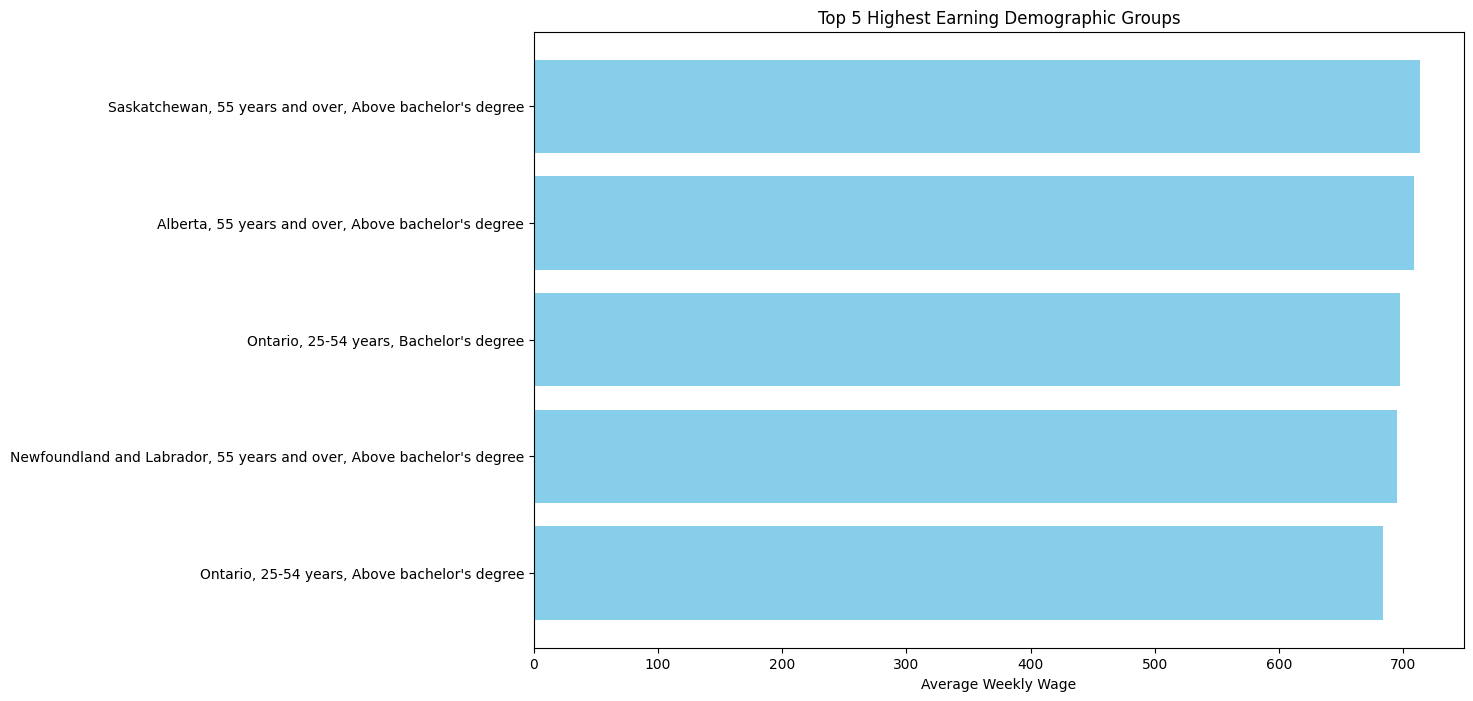

In [75]:
data['Age group'] = data['Age group'].str.strip()
data['Education level'] = data['Education level'].str.strip()
data['Geography'] = data['Geography'].str.strip()

included_age_groups = [
    '15-24 years', '25-34 years', '25-54 years', '55 years and over'
]
included_education_levels = [
    'Some high school', 'High school graduate', 'Some post-secondary',
    'Post-secondary certificate or diploma', 'Trade certificate or diploma',
    'Community college, CEGEP', 'University certificate below bachelors degree',
    "Bachelor's degree", "Above bachelor's degree"
]

filtered_data = data[
    (data['Type of work'].str.strip().str.lower() == 'full-time') & 
    (data['Age group'].isin(included_age_groups)) &
    (data['Education level'].isin(included_education_levels)) &
    (data['Geography'] != 'Canada')
]

grouped_data = filtered_data.groupby(['Age group', 'Education level', 'Geography'])['Both Sexes'].mean().reset_index()

top_earning_groups = grouped_data.sort_values(by='Both Sexes', ascending=False).head(5)


plt.figure(figsize=(12, 8))
plt.barh(top_earning_groups['Geography'] + ', ' + top_earning_groups['Age group'] + ', ' + top_earning_groups['Education level'],
         top_earning_groups['Both Sexes'], color='skyblue')
plt.xlabel('Average Weekly Wage')
plt.title('Top 5 Highest Earning Demographic Groups')
plt.gca().invert_yaxis()  
plt.show()



<h2><u>Analysis of demographics</u></h2>

The provided bar chart illustrates the top 5 highest earning demographic groups segmented by age, education level, and geography. Here are some observations and conclusions drawn from this data:

1. **Geography as a Determinant**: The chart shows that the province of Ontario dominates the list with two out of the five top spots, suggesting that Ontario's job market is particularly favorable for higher wages. This may reflect Ontario's economic status as one of the leading provinces in Canada, with a concentration of high-paying industries.

2. **Age and Experience**: The age group of '25-54 years' appears twice in the chart, indicating that this bracket, which captures individuals in their mid-career, is associated with peak earning potential. Moreover, the presence of the '55 years and over' group in the remaining three spots indicates that seniority and extensive experience also correspond to higher earnings, likely due to these individuals occupying advanced positions within their fields.

3. **Educational Impact**: When looking at the educational breakdown, the chart indicates that individuals with 'Above bachelor's degree' and 'Bachelor's degree' are among the top earners, reinforcing the idea that higher education correlates with higher income levels. 

4. **Economic Diversity Across Provinces**: The presence of Alberta and Saskatchewan suggests economic diversity across Canada's provinces. These regions are likely to have lucrative sectors such as oil and gas, which traditionally offer higher wages, especially for seasoned professionals, which is reflected in the '55 years and over' age group.

<h2><u>Conclusion</u></h2>

The data highlights that a combination of factors, including geography, education, and age, plays a critical role in determining weekly wage levels. The frequency of Ontario's apperance in the top 5 chart shows the province's economic vitality and suggests that both traditional university education and vocational training can yield high returns in terms of earnings. For individuals, this information could be useful for career planning, while for policymakers, the insights could help in tailoring educational programs and economic policies to harness the potential of the workforce fully. The analysis also points to the value of experience, as indicated by the earnings of older age groups across different geographies.